### visualize audio data from dataset
- This notebook is just to get an idea of what parameters you should be using when creating your dataset. 
- The notebook shows you how to take a look at individual segmented elements

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd
import IPython

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [3]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir

In [4]:
from avgn.signalprocessing.create_spectrogram_dataset import create_syllable_df, get_element
from avgn.signalprocessing.create_spectrogram_dataset import make_spec
from avgn.visualization.spectrogram import visualize_spec, plot_spec

In [5]:
from avgn.visualization.projections import scatter_projections
from avgn.visualization.quickplots import draw_projection_plots

### Collect data

In [28]:
hparams = HParams(
    num_mel_bins = 64,
    butter_lowcut = 20000,
    butter_highcut = 124000,
    mel_lower_edge_hertz = 40000,
    mel_upper_edge_hertz = 124000,
    win_length_ms = .5,
    hop_length_ms = .1,
    n_fft = 1024,
    ref_level_db = 25,
    min_level_db = -50
    )

In [29]:
DATASET_ID = 'tachibana_mouse' #'tachibana_gerbil'
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

### get a syllable from the dataset

In [30]:
datafile = list(dataset.data_files.values())[0]
element = "syllables"
element_number = 25
indv = None

In [31]:
rate, syll = get_element(datafile, indv, element_number, element, dataset.hparams)

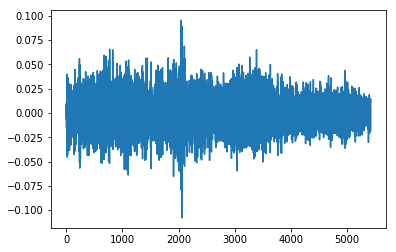

In [32]:
plt.plot(syll)
IPython.display.Audio(data=syll, rate=int(rate/10))

### view spectrogram of syllable

In [33]:
# make a spectrogram
spec = make_spec(
        syll,
        rate,
        hparams=hparams,
        mel_matrix=dataset.mel_matrix,
        use_mel=True,
        use_tensorflow=False,
    
    )
np.shape(spec)

(64, 218)

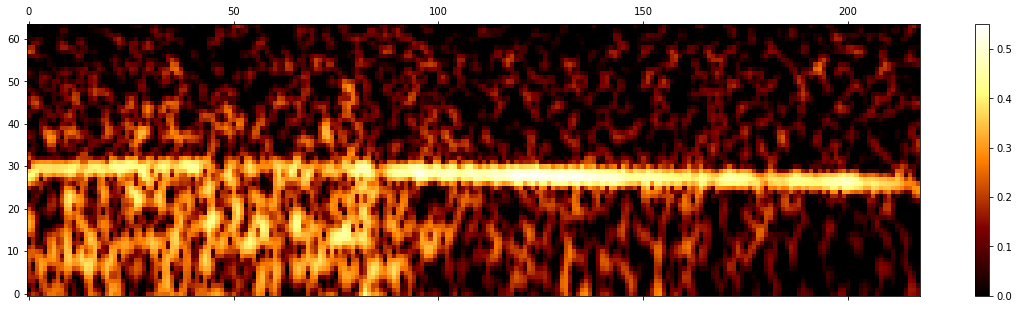

In [34]:
visualize_spec(spec)

### view a set of spectrograms from dataset

In [35]:
element = "syllables"

DATASET_ID = 'tachibana_mouse'#'tachibana_gerbil'
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = hparams)

In [36]:
datafile = list(dataset.data_files.values())[0]

In [37]:
n_elements = len(
    datafile.data["indvs"][list(datafile.data["indvs"])[0]][element]["start_times"]
)
n_elements

203

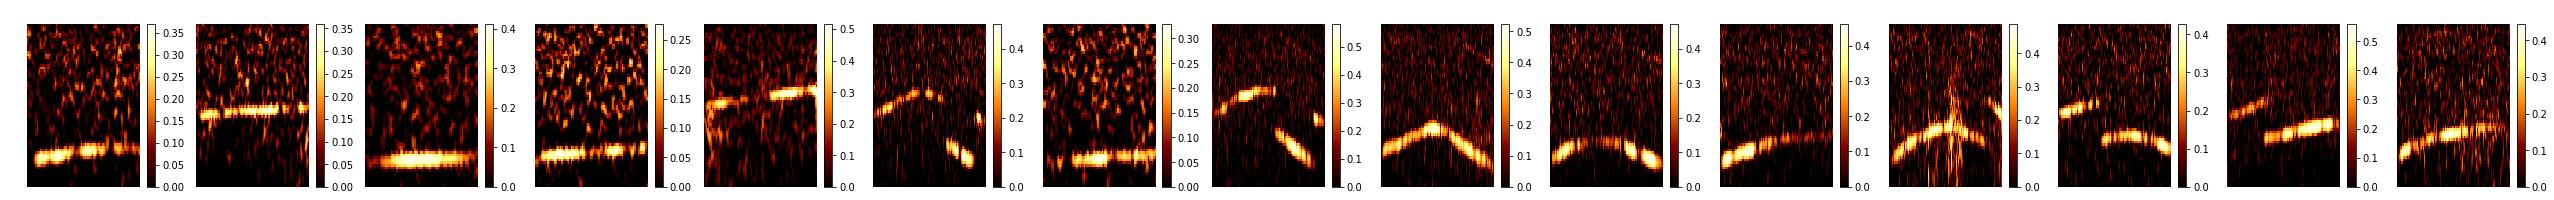

In [38]:
n_elements = 15
specs = []
for element_number in tqdm(range(n_elements)):
    rate, syll = get_element(datafile, indv, element_number, element, dataset.hparams)
    spec = make_spec(
        syll,
        rate,
        hparams=hparams,
        mel_matrix=dataset.mel_matrix,
        use_mel=True,
        use_tensorflow=False,
    
    )
    specs.append(spec)
    
fig, axs = plt.subplots(ncols = n_elements, figsize= (n_elements*3, 3))
for si, spec in enumerate(specs):
    plot_spec(spec, fig, axs[si])
    axs[si].axis('off')